# Naive Bayes Classifier

# Objective:
To filter mobile phone spam using the Naive Bayes algorithm

# Dataset: sms_spam.csv
https://github.com/stedy/Machine-Learning-with-R-datasets

# 1. Load necessary libraries

In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

import string
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report
import statsmodels.api as sm

# 2. Load data

In [3]:
df = pd.read_csv('spamsms.csv',encoding = 'latin-1')
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# 3. Exploring and preparing the data 

In [5]:
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


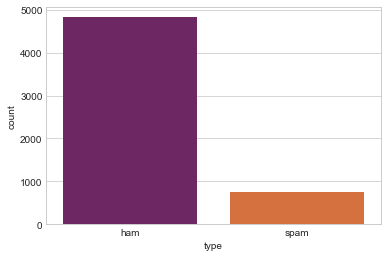

In [6]:
sns.countplot('type',data=df,palette='inferno')

# 4. Prepare the data by splitting the text documents into words and also create indicator feature for frequent words


In [8]:
def text_process (x):
    return x.split()

In [9]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['text'])
print(len(bow_transformer.vocabulary_))

15585


In [28]:
x_train = bow_transformer.vocabulary_
print(x_train)

{'Go': 2642, 'until': 14612, 'jurong': 10030, 'point,': 12063, 'crazy..': 7510, 'Available': 1543, 'only': 11596, 'in': 9718, 'bugis': 6740, 'n': 11185, 'great': 9144, 'world': 15215, 'la': 10169, 'e': 8132, 'buffet...': 6739, 'Cine': 1974, 'there': 14086, 'got': 9111, 'amore': 5960, 'wat...': 14889, 'Ok': 3887, 'lar...': 10218, 'Joking': 3144, 'wif': 15075, 'u': 14524, 'oni...': 11588, 'Free': 2503, 'entry': 8301, '2': 681, 'a': 5674, 'wkly': 15148, 'comp': 7317, 'to': 14258, 'win': 15093, 'FA': 2391, 'Cup': 2055, 'final': 8616, 'tkts': 14246, '21st': 718, 'May': 3548, '2005.': 707, 'Text': 4891, '87121': 1192, 'receive': 12494, 'question(std': 12357, 'txt': 14508, "rate)T&C's": 12413, 'apply': 6067, "08452810075over18's": 298, 'U': 5037, 'dun': 8116, 'say': 12894, 'so': 13384, 'early': 8145, 'hor...': 9521, 'c': 6806, 'already': 5920, 'then': 14077, 'say...': 12898, 'Nah': 3723, 'I': 2950, "don't": 7993, 'think': 14123, 'he': 9321, 'goes': 9068, 'usf,': 14674, 'lives': 10443, 'around

In [29]:
print(bow_transformer.get_feature_names()[0])
print(bow_transformer.get_feature_names()[2642])
print(bow_transformer.get_feature_names()[8555])
print(bow_transformer.get_feature_names()[15584])

!
Go
february
åÔrents


In [30]:
messages_bow = bow_transformer.transform(x_train)

In [31]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [32]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [33]:
print(messages_tfidf.shape)

(15585, 15585)


In [35]:
# print(messages_tfidf)

# 5. Create training and test datasets

In [36]:
df['length'] = df['text'].apply(lambda x: len(x))
df = df[df['length']>0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5572 non-null   object
 1   text    5572 non-null   object
 2   length  5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 174.1+ KB


In [37]:
x_train = df[:4168]['text']
y_train = df[:4168]['type']
x_test = df[4168:]['text']
y_test = df[4168:]['type']

# 6. Create indicator features for frequent words

In [38]:
messages_bow = bow_transformer.transform(x_train)
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(4168, 15585)


# 7. Train a model on the data

In [39]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, y_train)

# 8. Evaluate model performance

In [40]:
messages_bow = bow_transformer.transform(x_test)
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(1404, 15585)


In [41]:
y_pred = spam_detect_model.predict(messages_tfidf)
print(y_pred)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [42]:
print("confusion_matrix")
print(confusion_matrix(y_test,y_pred))

confusion_matrix
[[1222    0]
 [  80  102]]


# 9. Measure performance for classifcation

In [43]:
df_table = confusion_matrix(y_test,y_pred)
a = (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])
p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
f = (2 * p * r) / (p + r)

print("accuracy : ",round(a,2))
print("precision: ",round(p,2))
print("recall   : ",round(r,2))
print("F1 score : ",round(f,2))

accuracy :  0.94
precision:  1.0
recall   :  0.56
F1 score :  0.72
